In [128]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Milestone 4: Baseline model for Consumer Confidence Index forecast

#### By: Mali Akmanalp, Jose Morales Arilla, Kevin Shain

For this baseline model, we'll take a simple approach. We'll put together:

- The sentiment data from the SentiWordNet word dictionary (as described here): https://github.com/kevinshain/Economic_Sentiment_Forecast/blob/master/SentiWordNet.ipynb
- The data discovery done on the CCI data with an ARIMA model (as described here): https://github.com/kevinshain/Economic_Sentiment_Forecast/blob/master/ARIMAmodel.ipynb

These links are also part of the report.

For the baseline model, we will not yet use a full ARIMA model, because of questions regarding how to include additional exogenous variables to the ARIMA model in statsmodels. Instead, for now we'll use the results of the model - it converged on two AR lags, so we'll simply run a regular regression two CCI lagged variables, plus the sentiment data, to predict CCI.

---

Load NYTimes article corpus:

In [9]:
DATA_DIR = "./data/"

In [23]:
all_data_list = []
for year in range(1997,2012):
    data = pd.read_csv(DATA_DIR + '{}_Output.csv'.format(year), header=None, encoding="utf-8")
    all_data_list.append(data) # list of dataframes
data = pd.concat(all_data_list, axis=0)
data.columns = ['id','date','headline', 'lead']

# Drop dupes and fix dates
data = data.drop_duplicates("id").reset_index(drop=True)
data.date = pd.to_datetime(data.date)

Load CCI data:

In [123]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
cci = pd.read_csv('./CCI.csv', parse_dates=True, index_col='TIME',date_parser=dateparse)
cci = cci["Value"]
cci.name = "CCI"
cci = cci.to_frame()

Put the nytimes corpus through sentiment analysis:

In [25]:
# Can be found in sentiwordnet.py, or also the SentiWordNet notebook:
# https://github.com/kevinshain/Economic_Sentiment_Forecast/blob/master/SentiWordNet.ipynb

# If it complains about missing corpuses, try:
# nltk.download("sentiwordnet")
# nltk.download("stopwords")


import sentiwordnet

We'll subset the data for now because the sentiment analysis operation is computational expensive:

In [137]:
data_subset = data[data.date.dt.year.isin(range(2005, 2008))]

In [138]:
sentiments = pd.DataFrame(
    map(sentiwordnet.get_sentiment, data_subset.lead.values),
    columns=["pos", "neg", "subj"]
)
sentiments.index = data_subset.index.copy()

In [139]:
data_subset = data_subset.join(sentiments)

Positive sentiment articles:

In [140]:
data_subset[data_subset.pos > 0.80]

,id,date,headline,lead,pos,neg,subj
124624,4fd283998eb7c8105d8519f0,2005-02-03 00:00:00,Fed Steps Up Interest Rates A Sixth Time,The Federal Reserve raised short-term interest...,0.875000,0.000000,0.028226
125262,4fd244408eb7c8105d7de87c,2005-02-16 00:00:00,RAYOVAC PLANS TO CHANGE ITS NAME TO SPECTRUM B...,"The Rayovac Corporation, which completed its a...",0.875000,0.000000,0.024306
130974,4fd25f0c8eb7c8105d80eaa2,2005-07-17 00:00:00,A Week To Follow The Fed,"IT'S Fed speak week. On Wednesday, Alan Greens...",0.875000,0.000000,0.043750
138178,4fd2ab808eb7c8105d89850e,2006-03-16 00:00:00,Northwest to Cooperate in Pension Inquiry,The Northwest Airlines Corporation said on Wed...,1.000000,0.000000,0.043478
138429,4fd364b98eb7c8105d8b385d,2006-03-22 06:58:30,J.P. Morgan Sets $8 Billion Share Buyback,J.P. Morgan Chase said Tuesday that it would b...,0.875000,0.000000,0.067308
143650,54b4d86c38f0d8623a35485a,2006-06-07 00:00:00,Chirac Lukewarm on NYSE Group's Deal for Euronext,The struggle for control over stock exchanges ...,0.875000,0.000000,0.072917
143717,54b4d46d38f0d8623a3547e8,2006-06-06 00:00:00,Struggle Over Continental Stock Exchanges Take...,President Jacques Chirac of France said that h...,0.875000,0.000000,0.087500
148546,4fd365828eb7c8105d8b4cb3,2006-08-24 07:42:11,Tower Records Founder Explores Bid,"Russ Solomon, who started Tower Records in the...",0.875000,0.000000,0.046053
149892,4fd366138eb7c8105d8b5995,2006-09-12 07:59:47,Tyco's Former Tax Chief Surrenders,Tyco's former tax chief surrendered to federal...,0.888889,0.013889,0.059211
149900,4fd365b38eb7c8105d8b5129,2006-09-12 07:51:27,House Panel and U.S. Attorney Join H.P. Inquiry,As its directors continued to confer on the fu...,0.888889,0.013889,0.059211


Negative sentiment articles:

In [141]:
data_subset[data_subset.neg > 0.80]

,id,date,headline,lead,pos,neg,subj
142253,54b3f09d38f0d82eb90f2223,2006-05-17 00:00:00,Jury Begins \nDeliberations in \nEnron Trial,The case went to the jury after a federal pros...,0.000,0.875000,0.062500
142745,54b41d2a38f0d8623a353ac7,2006-05-24 00:00:00,Euronext Turns Down Offer From German Exchange,Euronext shareholders rebuffed a rival offer f...,0.125,0.875000,0.111111
142805,54b4190e38f0d8623a353a47,2006-05-23 00:00:00,Big Board's Bid for Euronext Advances,"Euronext shareholders rebuffed a rival offer, ...",0.125,0.875000,0.125000
146296,54aea5bb38f0d817e02e8227,2006-07-21 00:00:00,Toyota&#8217;s Leader Expresses No Interest in...,Katsuaki Watanabe denied reports that Toyota m...,0.000,0.875000,0.125000
152243,54a3f6be38f0d80267d2a198,2006-10-16 00:00:00,Disney Chief’s Gift to College Draws Students’...,Students at Ithaca College planned to protest ...,0.000,0.875000,0.072917
156726,548d607138f0d80cddfa084b,2007-01-04 00:00:00,Judge Drops KPMG Charge in Tax Case,A federal judge dismissed a criminal charge ac...,0.000,0.875000,0.079545
158010,4fd367688eb7c8105d8b7781,2007-01-24 07:31:31,Newbridge to Take Controlling Stake in Taiwan ...,The buyout firm Newbridge Capital agreed to ta...,0.000,0.875000,0.025000
158942,548ea31538f0d8437a5dc44e,2007-02-06 00:00:00,Hyundai Chief Sentenced to Prison for Embezzling,"Chung Mong-koo, 68, committed a “clearly crimi...",0.000,0.875000,0.125000
160524,54901be638f0d8019c0ae879,2007-03-14 00:00:00,Russian Company Accused of Buying Press Coverage,A Norwegian cellphone company claims that a Ru...,0.000,0.875000,0.067308
161775,5490b24c38f0d847ca7e2486,2007-03-30 00:00:00,Shares Rise Despite Concerns About Iran,Investors weighed fears about mounting tension...,0.000,0.875000,0.079545


Distribution of sentiment values in corpus:

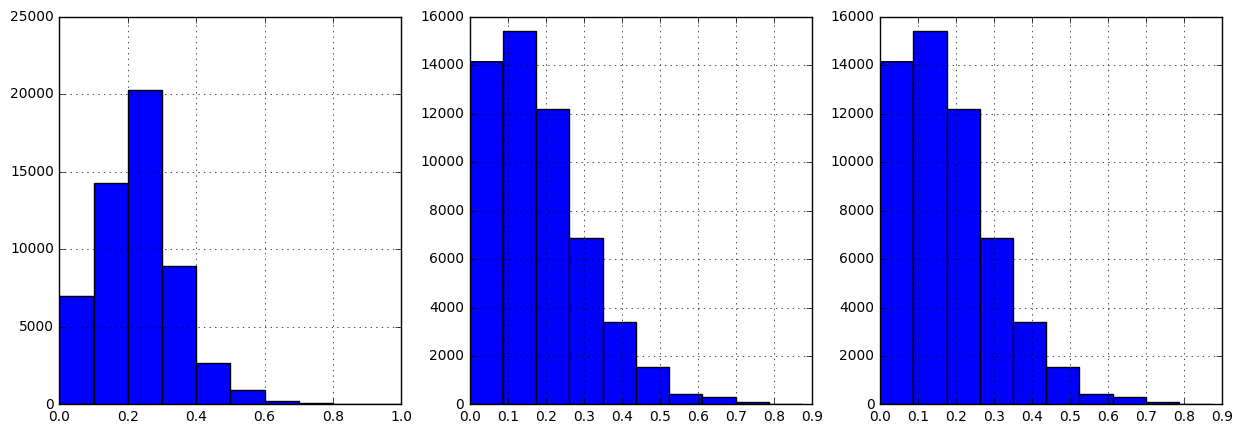

In [142]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

data_subset.pos.hist(bins=10, ax=ax[0], label="Positive scores")
data_subset.neg.hist(bins=10, ax=ax[1], label="Negative scores")
data_subset.neg.hist(bins=10, ax=ax[2], label="Subjectivity scores")

Make sentiment monthly to match CCI data:

In [162]:
monthly_sentiment = data_subset[["date", "pos", "neg", "subj"]].set_index("date").resample("MS").sum()
monthly_sentiment.head()

,pos,neg,subj
date,,,
2005-01-01,278.546334,228.273916,96.959428
2005-02-01,265.337497,220.330409,94.315442
2005-03-01,301.436681,243.814288,104.985350
2005-04-01,291.145752,238.295956,100.514597
2005-05-01,261.674438,219.859919,94.365461


Add in AR lags:

In [163]:
lag_1 = monthly_sentiment.shift(1)
lag_2 = monthly_sentiment.shift(2)
monthly_sentiment = monthly_sentiment.join(lag_1, rsuffix="_lag1").join(lag_2, rsuffix="_lag2")
monthly_sentiment.head()

,pos,neg,subj,pos_lag1,neg_lag1,subj_lag1,pos_lag2,neg_lag2,subj_lag2
date,,,,,,,,,
2005-01-01,278.546334,228.273916,96.959428,NaN,NaN,NaN,NaN,NaN,NaN
2005-02-01,265.337497,220.330409,94.315442,278.546334,228.273916,96.959428,NaN,NaN,NaN
2005-03-01,301.436681,243.814288,104.985350,265.337497,220.330409,94.315442,278.546334,228.273916,96.959428
2005-04-01,291.145752,238.295956,100.514597,301.436681,243.814288,104.985350,265.337497,220.330409,94.315442
2005-05-01,261.674438,219.859919,94.365461,291.145752,238.295956,100.514597,301.436681,243.814288,104.985350


In [164]:
monthly_sentiment = monthly_sentiment.join(cci, how="left")
monthly_sentiment.head()

,pos,neg,subj,pos_lag1,neg_lag1,subj_lag1,pos_lag2,neg_lag2,subj_lag2,CCI
date,,,,,,,,,,
2005-01-01,278.546334,228.273916,96.959428,NaN,NaN,NaN,NaN,NaN,NaN,101.0300
2005-02-01,265.337497,220.330409,94.315442,278.546334,228.273916,96.959428,NaN,NaN,NaN,100.8742
2005-03-01,301.436681,243.814288,104.985350,265.337497,220.330409,94.315442,278.546334,228.273916,96.959428,100.6444
2005-04-01,291.145752,238.295956,100.514597,301.436681,243.814288,104.985350,265.337497,220.330409,94.315442,100.4558
2005-05-01,261.674438,219.859919,94.365461,291.145752,238.295956,100.514597,301.436681,243.814288,104.985350,100.5238


In [178]:
# Drop the rows with null values because of lag
monthly_sentiment = monthly_sentiment.dropna(how="any", axis=0)

Since the CCI data is monthly, we do have a tiny dataset, and thus splitting into train / test seems problematic. If we fit on the full dataset with cross validation and test it on itself:

In [191]:
from sklearn.linear_model import RidgeCV
from sklearn.cross_validation import train_test_split

In [192]:
ridge = RidgeCV()

In [193]:
ridge.fit(monthly_sentiment.iloc[:, :-1], monthly_sentiment.CCI)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [194]:
ridge.score(monthly_sentiment.iloc[:, :-1], monthly_sentiment.CCI)

0.32568222882065601

This isn't spectacular, but not bad for real world data either, for such low effort. If we do the train / test split:

In [195]:
train, test = train_test_split(monthly_sentiment, train_size=0.8)

In [196]:
ridge.fit(train.iloc[:, :-1], train.CCI)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [198]:
ridge.score(train.iloc[:, :-1], train.CCI)

0.32293415161517136

In [197]:
ridge.score(test.iloc[:, :-1], test.CCI)

-0.068527977066445755

This is slightly disappointing - lack of avaliable data could be an issue, and we can retry after we generate sentiments for the whole time series. Another thought could be that the values vary so little, and so it's hard for the regression to pick up on these small differences. 